# Correlation Analysis
## Chapters
- I. Import Necessary Libraries
- II. Standardizing Values using Zscore
- III. Preprocess Data for Correlation
- IV. Correlation Matrix
- V. Recommender System
- VI. Heatmaps

## I. Importing Necessary Libraries

In [14]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [15]:
df = pd.read_csv("data.csv")
df


,City,age_pyramid_total_nyc,median_household_income_nyc,median_personal_earnings_nyc,no_hs_nyc,at_least_hs_nyc,complete_hs_somecollege_nyc,complete_bach_nyc,at_least_bachelors_nyc,grad_degree_nyc,...,veterans_poverty_nyc,veterans_poverty_percent_nyc,veterans_poverty_disabled_nyc,veterans_poverty_disabled_percent_nyc,vet_total_nyc_18_64,veterans_unemployed_nyc,veterans_unemployed_percent_nyc,veterans_disabled_nyc,veterans_disabled_percent_nyc,year
0,"New York city, New York",8550405,55752,36087,19.097573,80.902427,44.058038,21.885647,36.844389,14.958742,...,17862,11.379897,7520,4.790999,69775,3139,4.498746,24730,15.755506,2015
1,"New York city, New York",8537673,58856,36871,18.456166,81.543834,44.523201,21.543797,37.020633,15.476836,...,14778,10.027073,6719,4.558932,70710,3362,4.754632,25358,17.205746,2016
2,"New York city, New York",8622698,60879,38430,18.114607,81.885393,44.563906,21.631749,37.321486,15.689738,...,13927,9.233880,4623,3.065142,68674,3958,5.763462,20653,13.693353,2017
3,"New York city, New York",8398748,63799,40932,17.287630,82.712370,43.728064,22.835438,38.984307,16.148868,...,15986,11.129367,6252,4.352609,64621,2537,3.925968,21320,14.842869,2018
4,"New York city, New York",8336817,69407,42326,16.779843,83.220157,44.000053,22.727674,39.220104,16.492430,...,16280,11.789583,7352,5.324141,64353,2559,3.976505,20634,14.942645,2019
5,"New York city, New York",8467513,67997,43133,16.133492,83.866508,42.906229,23.516056,40.960278,17.444222,...,15750,11.808101,5885,4.412106,60375,3588,5.942857,22002,16.495355,2021


## II. Standardization (Z-score normalization) 

This technique involves subtracting the mean and dividing by the standard deviation for each value of each variable. The result is that variables are measured on a common scale with a mean of 0 and a standard deviation of 1.


- Summary : We want to make the best correlations using standardized data

In [16]:
columns_to_standardize = df.columns[1:197]
for column in columns_to_standardize:
    df[column] = zscore(df[column])

df

,City,age_pyramid_total_nyc,median_household_income_nyc,median_personal_earnings_nyc,no_hs_nyc,at_least_hs_nyc,complete_hs_somecollege_nyc,complete_bach_nyc,at_least_bachelors_nyc,grad_degree_nyc,...,veterans_poverty_nyc,veterans_poverty_percent_nyc,veterans_poverty_disabled_nyc,veterans_poverty_disabled_percent_nyc,vet_total_nyc_18_64,veterans_unemployed_nyc,veterans_unemployed_percent_nyc,veterans_disabled_nyc,veterans_disabled_percent_nyc,year
0,"New York city, New York",0.672076,-1.452290,-1.325879,1.434938,-1.434938,0.170372,-0.653357,-1.049112,-1.353058,...,1.707077,0.509765,1.156772,0.545586,0.926376,-0.099574,-0.393191,1.200276,15.755506,2015
1,"New York city, New York",0.539949,-0.811021,-1.032473,0.801368,-0.801368,1.006441,-1.127480,-0.929627,-0.701801,...,-0.802078,-0.911415,0.335462,0.206758,1.184392,0.331593,-0.070319,1.530806,17.205746,2016
2,"New York city, New York",1.422298,-0.393080,-0.449029,0.463983,-0.463983,1.079604,-1.005497,-0.725664,-0.434178,...,-1.494455,-1.744686,-1.813684,-1.974243,0.622551,1.483949,1.202604,-0.945537,13.693353,2017
3,"New York city, New York",-0.901748,0.210175,0.487326,-0.352890,0.352890,-0.422714,0.663941,0.401645,0.142960,...,0.180756,0.246576,-0.143379,-0.094484,-0.495888,-1.263532,-1.115911,-0.594480,14.842869,2018
4,"New York city, New York",-1.544438,1.368757,1.009020,-0.854473,0.854473,0.066151,0.514480,0.561504,0.574826,...,0.419955,0.940153,0.984513,1.323997,-0.569844,-1.220995,-1.052145,-0.955537,14.942645,2019
5,"New York city, New York",-0.188138,1.077459,1.311034,-1.492926,1.492926,-1.899853,1.607913,1.741254,1.771252,...,-0.011255,0.959607,-0.519685,-0.007614,-1.667587,0.768560,1.428962,-0.235529,16.495355,2021


## III. Preprocess Data
Convert year into the index 

In [17]:
# DROP THE CITY COLUMN, It is unnecessary for our correlation
df = df.drop('City', axis=1)

# Replace 'Year' with the actual column name containing the years in your DataFrame
df.set_index('year', inplace=True)

In [18]:
df

,age_pyramid_total_nyc,median_household_income_nyc,median_personal_earnings_nyc,no_hs_nyc,at_least_hs_nyc,complete_hs_somecollege_nyc,complete_bach_nyc,at_least_bachelors_nyc,grad_degree_nyc,latino_pop_nyc,...,veterans_med_income_nyc,veterans_poverty_nyc,veterans_poverty_percent_nyc,veterans_poverty_disabled_nyc,veterans_poverty_disabled_percent_nyc,vet_total_nyc_18_64,veterans_unemployed_nyc,veterans_unemployed_percent_nyc,veterans_disabled_nyc,veterans_disabled_percent_nyc
year,,,,,,,,,,,,,,,,,,,,,
2015,0.672076,-1.452290,-1.325879,1.434938,-1.434938,0.170372,-0.653357,-1.049112,-1.353058,-1.231433,...,-0.954642,1.707077,0.509765,1.156772,0.545586,0.926376,-0.099574,-0.393191,1.200276,15.755506
2016,0.539949,-0.811021,-1.032473,0.801368,-0.801368,1.006441,-1.127480,-0.929627,-0.701801,0.592242,...,-0.186040,-0.802078,-0.911415,0.335462,0.206758,1.184392,0.331593,-0.070319,1.530806,17.205746
2017,1.422298,-0.393080,-0.449029,0.463983,-0.463983,1.079604,-1.005497,-0.725664,-0.434178,1.428637,...,0.043613,-1.494455,-1.744686,-1.813684,-1.974243,0.622551,1.483949,1.202604,-0.945537,13.693353
2018,-0.901748,0.210175,0.487326,-0.352890,0.352890,-0.422714,0.663941,0.401645,0.142960,0.801065,...,-1.383189,0.180756,0.246576,-0.143379,-0.094484,-0.495888,-1.263532,-1.115911,-0.594480,14.842869
2019,-1.544438,1.368757,1.009020,-0.854473,0.854473,0.066151,0.514480,0.561504,0.574826,-1.099600,...,1.417742,0.419955,0.940153,0.984513,1.323997,-0.569844,-1.220995,-1.052145,-0.955537,14.942645
2021,-0.188138,1.077459,1.311034,-1.492926,1.492926,-1.899853,1.607913,1.741254,1.771252,-0.490910,...,1.062516,-0.011255,0.959607,-0.519685,-0.007614,-1.667587,0.768560,1.428962,-0.235529,16.495355


# IV. Produce Correlation Matrix

In [19]:
correlation_matrix = df.corr()
correlation_matrix

,age_pyramid_total_nyc,median_household_income_nyc,median_personal_earnings_nyc,no_hs_nyc,at_least_hs_nyc,complete_hs_somecollege_nyc,complete_bach_nyc,at_least_bachelors_nyc,grad_degree_nyc,latino_pop_nyc,...,veterans_med_income_nyc,veterans_poverty_nyc,veterans_poverty_percent_nyc,veterans_poverty_disabled_nyc,veterans_poverty_disabled_percent_nyc,vet_total_nyc_18_64,veterans_unemployed_nyc,veterans_unemployed_percent_nyc,veterans_disabled_nyc,veterans_disabled_percent_nyc
age_pyramid_total_nyc,1.000000,-0.746539,-0.721950,0.662630,-0.662630,0.471650,-0.695634,-0.632688,-0.542627,0.432063,...,-0.303707,-0.370139,-0.747646,-0.485747,-0.714641,0.631425,0.850547,0.628440,0.390758,-0.030474
median_household_income_nyc,-0.746539,1.000000,0.972589,-0.961426,0.961426,-0.588893,0.805786,0.881985,0.905028,-0.186525,...,0.719134,-0.106758,0.509542,-0.080271,0.266695,-0.871934,-0.302724,0.003386,-0.716601,-0.126211
median_personal_earnings_nyc,-0.721950,0.972589,1.000000,-0.988286,0.988286,-0.729969,0.905428,0.953633,0.947565,-0.163830,...,0.597950,-0.044521,0.562569,-0.137251,0.204925,-0.955594,-0.286138,0.053649,-0.718335,-0.125271
no_hs_nyc,0.662630,-0.961426,-0.988286,1.000000,-1.000000,0.746818,-0.896998,-0.968028,-0.981896,0.126703,...,-0.634712,0.117927,-0.521895,0.178736,-0.175675,0.953129,0.192194,-0.150513,0.648040,0.016984
at_least_hs_nyc,-0.662630,0.961426,0.988286,-1.000000,1.000000,-0.746818,0.896998,0.968028,0.981896,-0.126703,...,0.634712,-0.117927,0.521895,-0.178736,0.175675,-0.953129,-0.192194,0.150513,-0.648040,-0.016984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vet_total_nyc_18_64,0.631425,-0.871934,-0.955594,0.953129,-0.953129,0.893675,-0.978392,-0.991252,-0.951186,0.249679,...,-0.495229,-0.101522,-0.658606,0.119419,-0.195615,1.000000,0.210839,-0.154806,0.594734,0.016754
veterans_unemployed_nyc,0.850547,-0.302724,-0.286138,0.192194,-0.192194,0.152005,-0.338704,-0.189244,-0.043910,0.398695,...,0.155224,-0.567241,-0.610661,-0.685949,-0.736418,0.210839,1.000000,0.932222,0.120299,0.019524
veterans_unemployed_percent_nyc,0.628440,0.003386,0.053649,-0.150513,0.150513,-0.192022,0.023734,0.175731,0.304323,0.287026,...,0.335171,-0.511948,-0.354601,-0.713005,-0.650296,-0.154806,0.932222,1.000000,-0.064083,0.050457
veterans_disabled_nyc,0.390758,-0.716601,-0.718335,0.648040,-0.648040,0.226652,-0.470740,-0.530264,-0.556545,-0.205361,...,-0.375757,0.288019,-0.067438,0.480629,0.271819,0.594734,0.120299,-0.064083,1.000000,0.768516


## V. Recommender System 
How to use : Select a variable and it returns the 5 most correlated variables

In [20]:
def get_top_correlated_variables(correlation_matrix, target_variable, n=5):
    if target_variable not in correlation_matrix:
        raise ValueError(f"{target_variable} is not a column in the correlation matrix")
    
    # Get the absolute values of correlations for the target variable
    target_correlations = correlation_matrix[target_variable].abs()
    
    # Drop the self-correlation of the variable
    target_correlations = target_correlations.drop(target_variable, errors='ignore')
    
    # Get the top n most correlated variables
    top_correlated_variables = target_correlations.sort_values(ascending=False).head(n)
    
    return top_correlated_variables
print(get_top_correlated_variables(correlation_matrix, "median_personal_earnings_nyc", 5))


age_pyramid_female_15_to_24_nyc         0.996854
perc_age_pyramid_female_45_to_54_nyc    0.993814
perc_age_pyramid_45_to_54_nyc           0.991996
perc_age_pyramid_15_to_24_nyc           0.990721
median_value_nyc                        0.989518
Name: median_personal_earnings_nyc, dtype: float64


## VI. Heatmap

Heatmap ran on all Variables

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.show()

Heatmap ran on only 5 variables :

'age_pyramid_total_nyc', 'median_household_income_nyc', 'median_personal_earnings_nyc', 'no_hs_nyc', 'at_least_hs_nyc',

The original heatmap is too condensed to understand, we zoomed in taking only 5 variables

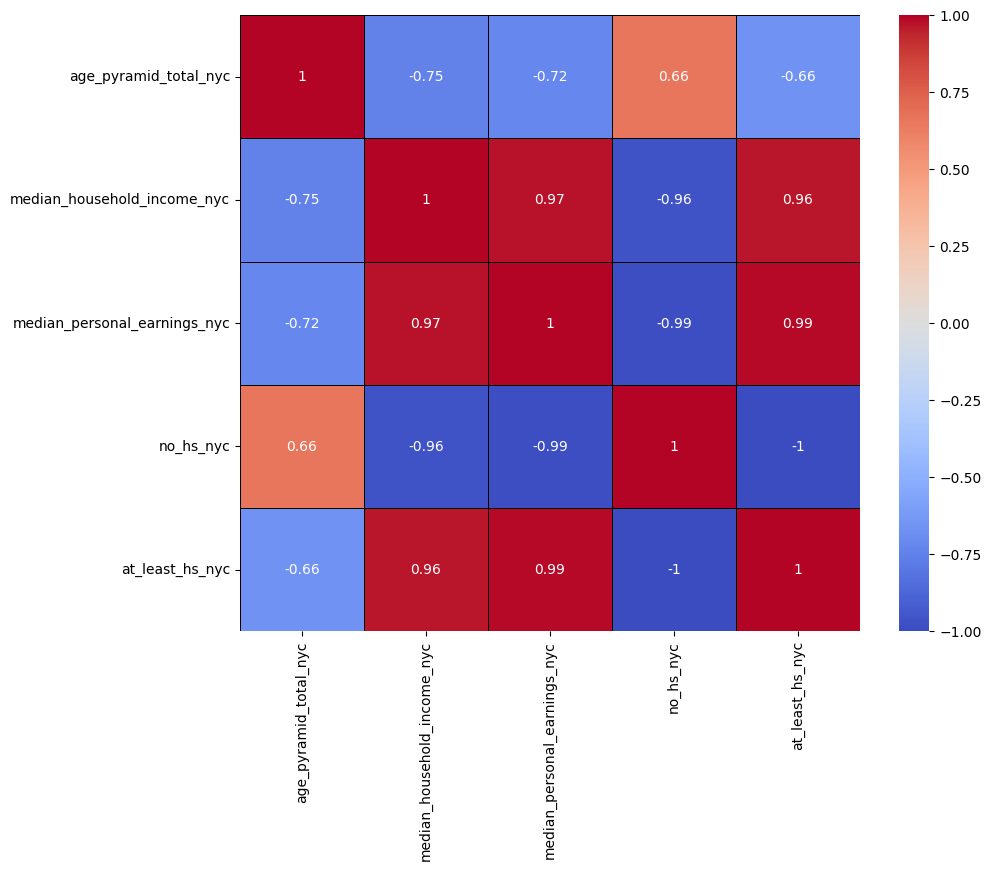

In [ ]:
col_list1 = ['age_pyramid_total_nyc', 'median_household_income_nyc', 'median_personal_earnings_nyc', 'no_hs_nyc', 'at_least_hs_nyc']
df_selected1 = df.loc[:, col_list1]

correlation_matrix1 = df_selected1.corr()
correlation_matrix1

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.show()

Analysis : 

Heatmap of a Pearson correlation matrix. It visualizes the correlation coefficients between different variables in your dataset. 

- The color scale on the right indicates the strength and direction of the correlation. Red colors represent positive correlations, blue colors represent negative correlations, and the intensity of the color corresponds to the strength of the correlation (the darker the color, the stronger the correlation).

- A correlation coefficient of 1 or -1 indicates a perfect linear relationship between two variables. A coefficient close to 0 indicates no linear relationship.

- The diagonal from the top-left to the bottom-right represents the correlation of each variable with itself, which is always 1 (perfect correlation).

Findings:

- age_pyramid_total_nyc is negatively correlated with median_household_income_nyc and median_personal_earnings_nyc (-0.75 and -0.72, respectively), indicating that as the age pyramid total increases, both median household income and median personal earnings tend to decrease.

- median_household_income_nyc and median_personal_earnings_nyc have a very high positive correlation (0.97), suggesting that households with higher median incomes also tend to have higher personal earnings.
- median_personal_earnings_nyc and no_hs_nyc (not completed high school) are highly negatively correlated (-0.99), indicating that higher earnings are associated with lower percentages of the population not completing high school.
- no_hs_nyc and at_least_hs_nyc (at least high school completed) are perfectly negatively correlated (-1), which makes sense since these two variables are directly inversely related: if more people have at least a high school education, fewer people will have no high school education.